# House Prices: Advanced Regression Techniques

**Name**: AI 0014
**Submission Date**: 12.1.2018

# Introduction

This assignment is based on the prediction of Sale price of house with the given features

# Step by step procedure

IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

EXTRACTING CSV FILE

In [2]:
data1=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


FEATURE SELECTION WITH RESPECT TO CORRELATION MATRIX USING TRAIN SET

[To check the relationship between the features and the salesprice]

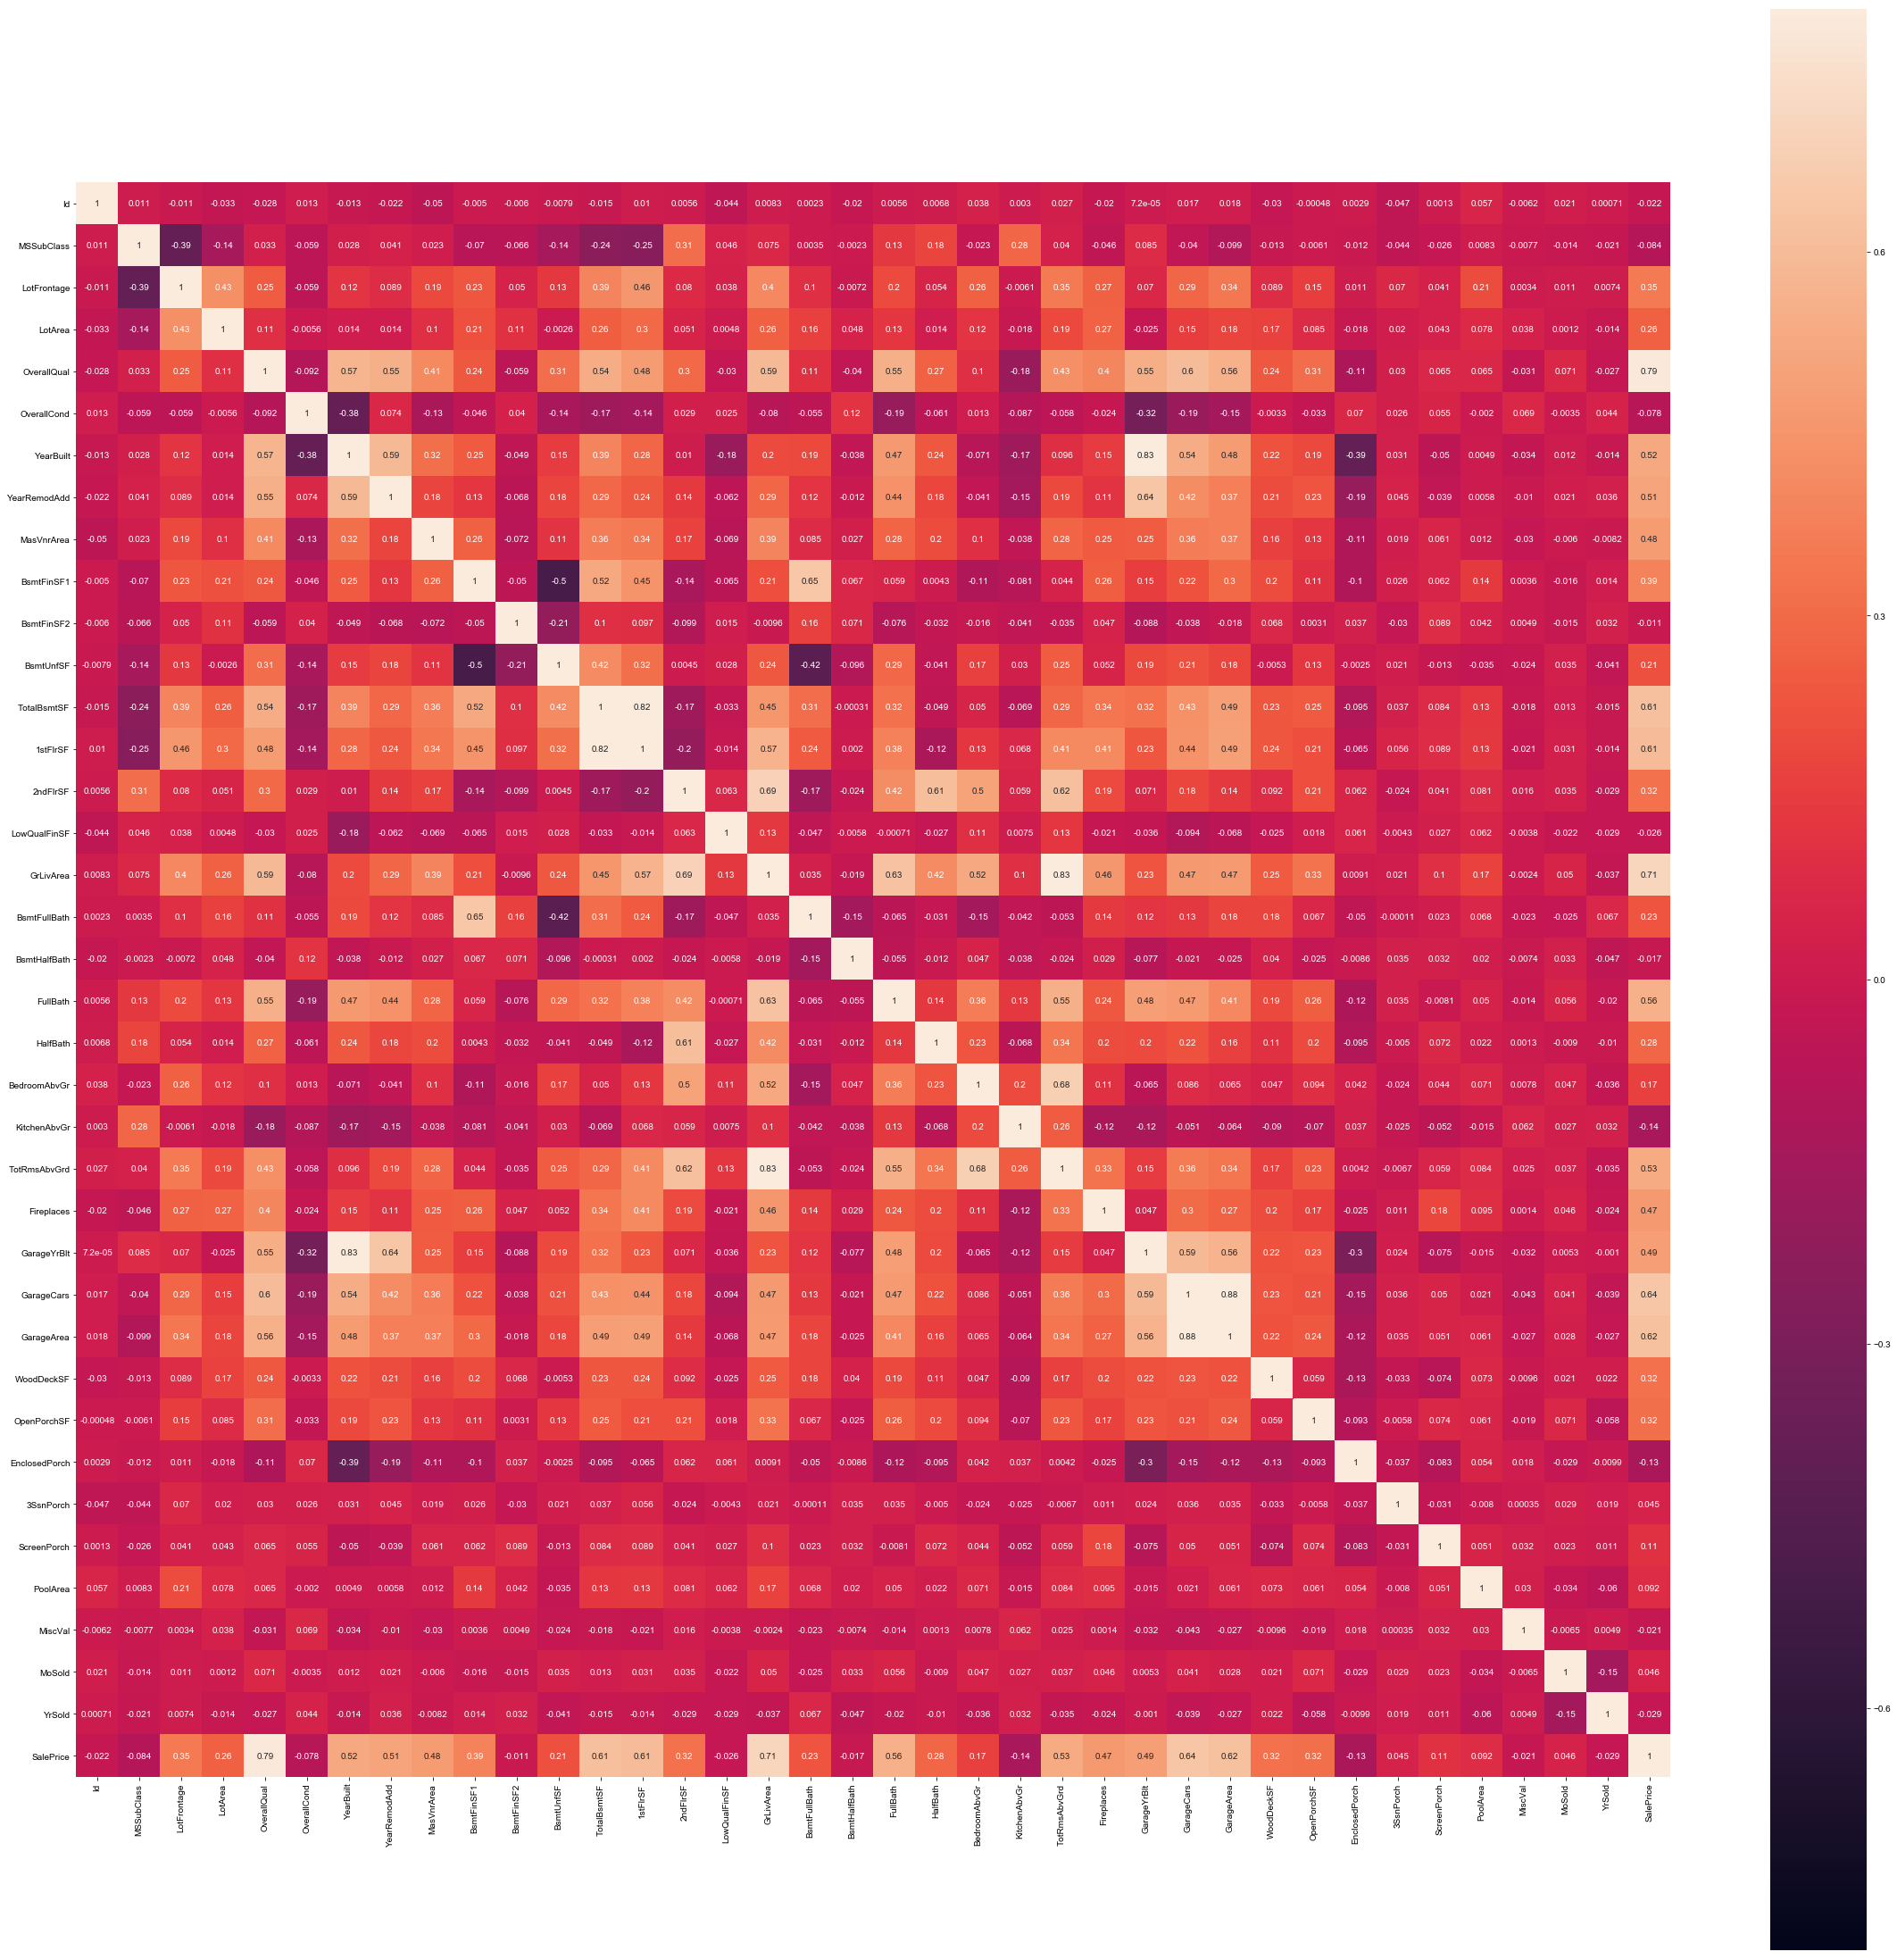

In [3]:
corrMat=data1.corr()
f, ax = plt.subplots(figsize=(40, 40))
fig1=sns.heatmap(corrMat,vmin=-0.8, vmax=0.8,annot=True, square=True)
sns.set(font_scale=1.5)
plt.show(fig1)

DETERMINING THE CORRELATION OF THE FEATURES IN DESCENDING ORDER

In [4]:
k=len(data1.columns)
cols=corrMat.nlargest(k,"SalePrice")['SalePrice'].index
cm=np.corrcoef(data1[cols].values.T)
print(cols)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


COMBINING TEST AND TRAIN DATA

In [5]:
target=data1["SalePrice"]
test1=test
data=data1
data=data.drop(["Id","SalePrice"],axis=1)
test1=test1.drop(["Id"],axis=1)
data=pd.concat([data,test1])

LOOKING FOR MISSING DATA

In [6]:
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])

missingData.head(20)


,total,percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


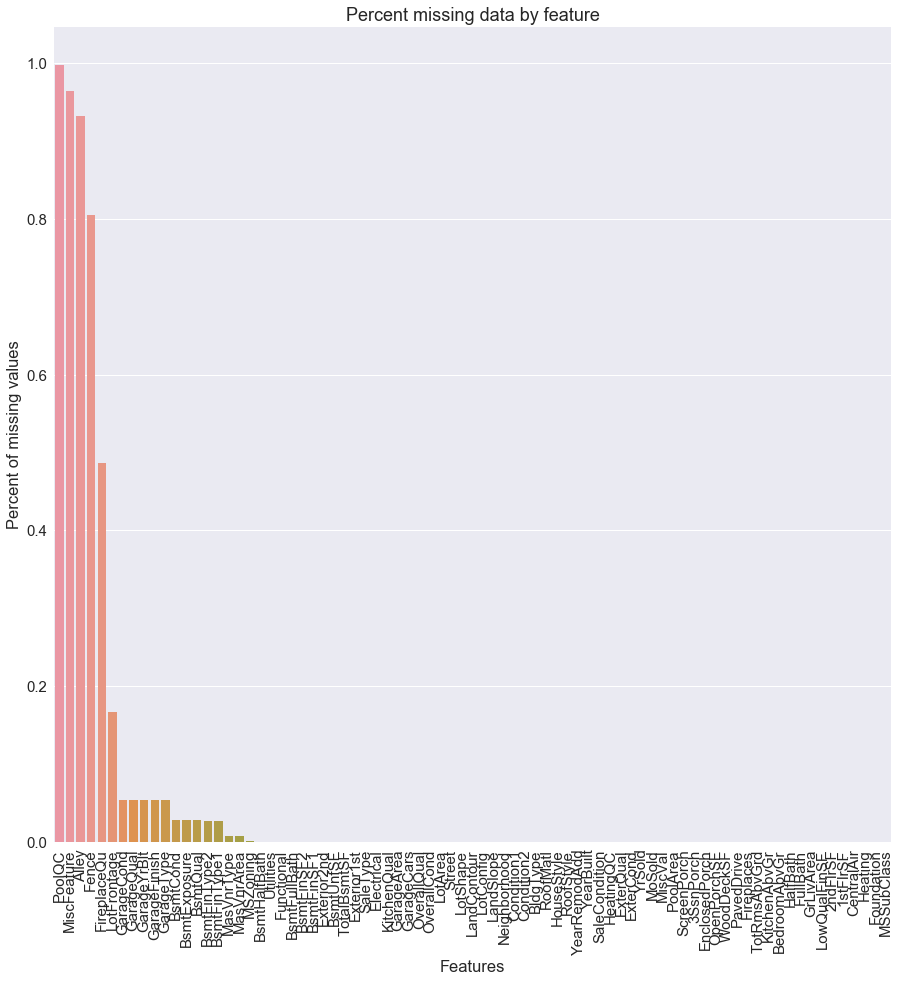

In [7]:
f, ax = plt.subplots(figsize=(15,15))
plt.xticks(rotation='90')
sns.barplot(x=missingData.index, y=missingData["percentage"])
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')
plt.show()

For the following columns, the missing data indicates that the feature isn't available, hence categorical features are replaced by "None" and the numerical data are replaced by 0

In [8]:
for col in ("PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType","MasVnrArea"):
    data[col] = data[col].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] =data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)


For the following features, the missing data is replaced by the most occuring feature element

In [9]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["Functional"] =data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] =data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

All records of utilities are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.

In [10]:
data = data.drop(['Utilities'], axis=1)

CHECKING FOR MISSING DATA AMONG THE CHOSEN FEATURES

In [11]:
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])

missingData.head(20)

,total,percentage
SaleCondition,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


WORKING WITH THE FEATURES 

CHECKING THE NORMALITY OF EACH FEATURE

In [12]:
def plots(pd):
    sns.distplot(pd,fit=norm)
    plt.figure()
    prob=stats.probplot(pd,plot=plt)
    plt.show()  
    

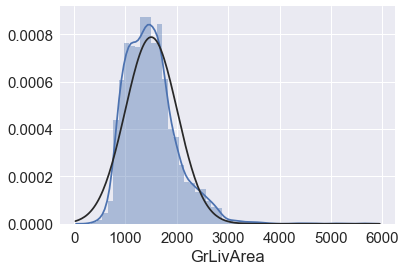

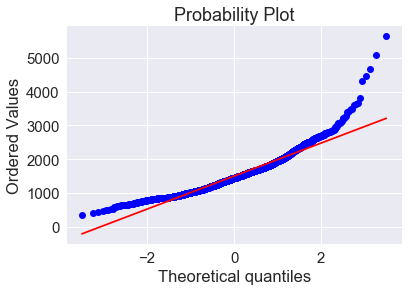

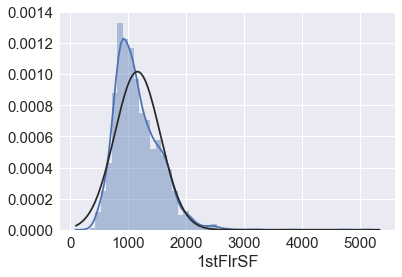

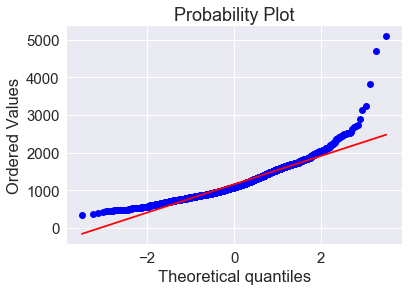

In [13]:
plots(data["GrLivArea"])
plots(data["1stFlrSF"])

THE FEATURES THAT CAN BE MADE INTO A NORMAL DISTRIBUTION ARE:
    
1.GRLIVAREA
2.1STFLRSF

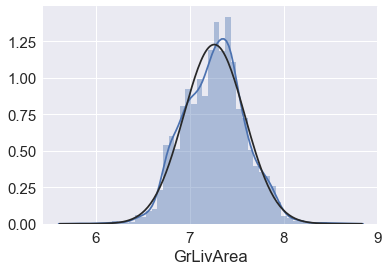

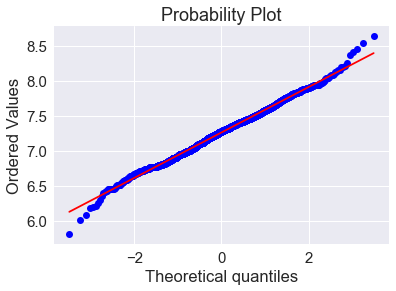

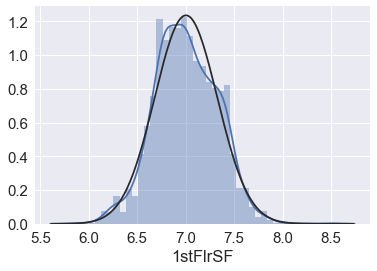

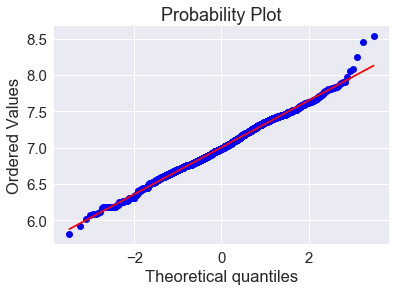

In [14]:
data["GrLivArea"]=np.log(data["GrLivArea"])
plots(data["GrLivArea"])
data["1stFlrSF"]=np.log(data["1stFlrSF"])
plots(data["1stFlrSF"])


LABELENCODING TO CONVERT CATEGORICAL DATA TO NUMERICAL DATA

In [15]:
from sklearn.preprocessing import LabelEncoder
cols=data.columns
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

In [16]:
trainSet=data[0:len(data1)]
testSet=data[len(data1):len(data)]
x=np.array(trainSet)
y=np.array(target)
testSet1=np.array(testSet)

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.optimizers import SGD,Adagrad
from keras.metrics import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


DEFINING THE ERROR FUNCTION

In [18]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [19]:
x.shape

(1460, 78)

DESIGNING KERAS MODEL

In [27]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model=Sequential()
    model.add(Dense(32,input_dim=78,kernel_initializer=init,activation="relu"))
    model.add(Dense(64,kernel_initializer=init,activation='relu'))
    model.add(Dropout(0.4))
    model.add( Dense(1,kernel_initializer=init,activation="relu"))
    model.compile(loss="mse",optimizer=optimizer,metrics=["accuracy"])
    return model

In [ ]:
seed = 7
np.random.seed(seed)
model=KerasClassifier(build_fn=create_model,epochs=10,batch_size=10,verbose=0)
optimizers = ['adam']
init = [ 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit (x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [26]:
# i=100

# j=0.40
# model=Sequential()
# model.add(Dense(i,input_dim=78,activation="relu"))

# model.add(Dense(i,activation='relu'))


# model.add(Dropout(j))


# model.add( Dense(1,activation="relu"))


# model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
# model.fit(x,y,validation_split=0.2,epochs=2)

In [ ]:
prediction=model.predict(testSet1)

In [ ]:
(prediction)

In [ ]:
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)

In [ ]:
predictedTest.to_csv("ResultS.csv",index=False)

KAGGLE SCORE

In [ ]:
from PIL import Image
IM=Image.open("Final score.png")
IM

# Conclusion

All the features were used in this neural network to obtain a score of about 0.13816. 